<a href="https://colab.research.google.com/github/adrian5520/Machine-learning/blob/main/MY%20PROJECTS/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(font_scale=1.3)
np.random.seed(42)     

In [111]:
test = pd.read_csv('/content/drive/MyDrive/house_price/test.csv')
train = pd.read_csv('/content/drive/MyDrive/house_price/train.csv')


In [112]:
print("Shape:", train.shape)
print("Duplicated data :", train.duplicated().sum())
print("Shape:", test.shape)
print("Duplicated data :", test.duplicated().sum())

Shape: (1460, 81)
Duplicated data : 0
Shape: (1459, 80)
Duplicated data : 0


In [113]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


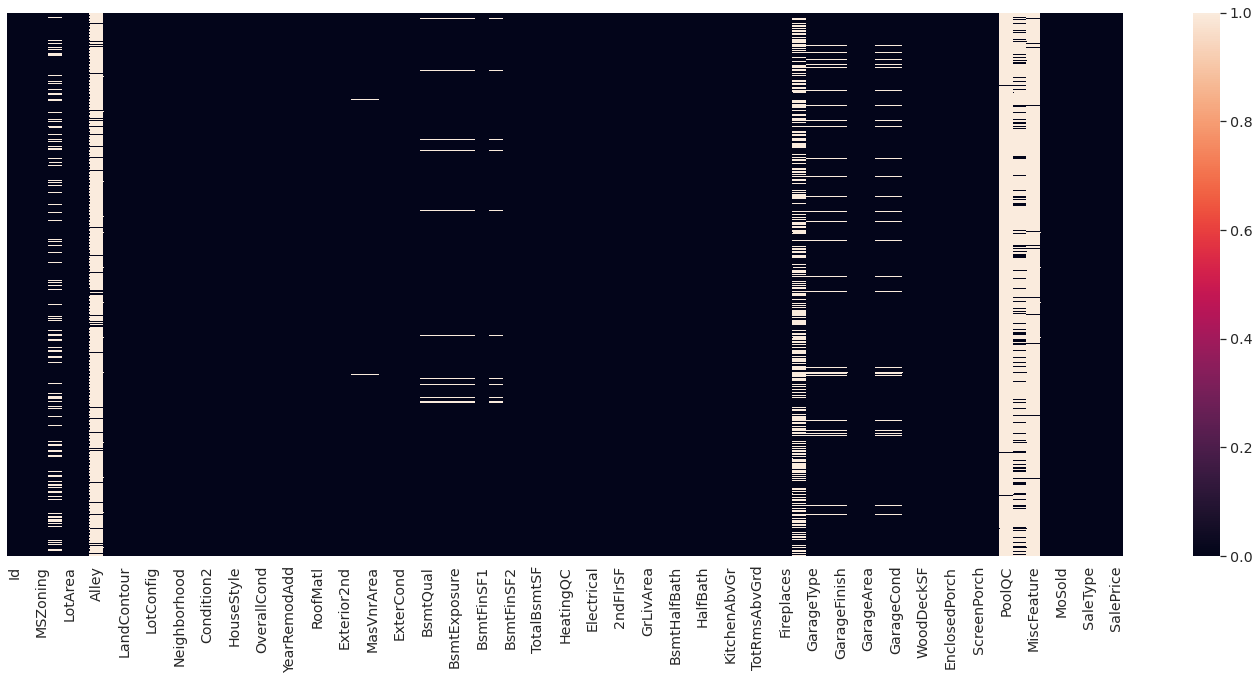

In [114]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(data=train.isnull(), yticklabels=False, ax=ax)

In [115]:
train.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [116]:
train.drop(['PoolQC','Fence','MiscFeature','Alley','LotFrontage'],axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [117]:
data_1=train[['MSSubClass','LotShape','HouseStyle','OverallQual','OverallCond','RoofStyle','Foundation','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea','PoolArea','SaleType']]

In [118]:
numeric_data = train.select_dtypes(include=[np.number])
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [119]:
data1=train[['MSSubClass','LotShape','HouseStyle','OverallQual','OverallCond','RoofStyle','Foundation','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea','PoolArea','SaleType']]

In [120]:
data1

,MSSubClass,LotShape,HouseStyle,OverallQual,OverallCond,RoofStyle,Foundation,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,PoolArea,SaleType
0,60,Reg,2Story,7,5,Gable,PConc,856,856,854,548,0,WD
1,20,Reg,1Story,6,8,Gable,CBlock,1262,1262,0,460,0,WD
2,60,IR1,2Story,7,5,Gable,PConc,920,920,866,608,0,WD
3,70,IR1,2Story,7,5,Gable,BrkTil,756,961,756,642,0,WD
4,60,IR1,2Story,8,5,Gable,PConc,1145,1145,1053,836,0,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,Reg,2Story,6,5,Gable,PConc,953,953,694,460,0,WD
1456,20,Reg,1Story,6,6,Gable,CBlock,1542,2073,0,500,0,WD
1457,70,Reg,2Story,7,9,Gable,Stone,1152,1188,1152,252,0,WD
1458,20,Reg,1Story,5,6,Hip,CBlock,1078,1078,0,240,0,WD


In [121]:
numeric_data = data1.select_dtypes(include=[np.number])
numeric_data

,MSSubClass,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,PoolArea
0,60,7,5,856,856,854,548,0
1,20,6,8,1262,1262,0,460,0
2,60,7,5,920,920,866,608,0
3,70,7,5,756,961,756,642,0
4,60,8,5,1145,1145,1053,836,0
...,...,...,...,...,...,...,...,...
1455,60,6,5,953,953,694,460,0
1456,20,6,6,1542,2073,0,500,0
1457,70,7,9,1152,1188,1152,252,0
1458,20,5,6,1078,1078,0,240,0


In [122]:
categorical_data = data1.select_dtypes(exclude=[np.number])
categorical_data

,LotShape,HouseStyle,RoofStyle,Foundation,SaleType
0,Reg,2Story,Gable,PConc,WD
1,Reg,1Story,Gable,CBlock,WD
2,IR1,2Story,Gable,PConc,WD
3,IR1,2Story,Gable,BrkTil,WD
4,IR1,2Story,Gable,PConc,WD
...,...,...,...,...,...
1455,Reg,2Story,Gable,PConc,WD
1456,Reg,1Story,Gable,CBlock,WD
1457,Reg,2Story,Gable,Stone,WD
1458,Reg,1Story,Hip,CBlock,WD


In [123]:
categorical_data['LotShape'] = categorical_data['LotShape'].astype('category')
categorical_data['LotShape'] = categorical_data['LotShape'].cat.codes
categorical_data['LotShape']

<ipython-input-123-e02cefa4bace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['LotShape'] = categorical_data['LotShape'].astype('category')
<ipython-input-123-e02cefa4bace>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['LotShape'] = categorical_data['LotShape'].cat.codes


0       3
1       3
2       0
3       0
4       0
       ..
1455    3
1456    3
1457    3
1458    3
1459    3
Name: LotShape, Length: 1460, dtype: int8

In [124]:
categorical_data['HouseStyle']= categorical_data['HouseStyle'].astype('category')
categorical_data['HouseStyle']= categorical_data['HouseStyle'].cat.codes
categorical_data['HouseStyle'].unique()

<ipython-input-124-2c162a743c88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['HouseStyle']= categorical_data['HouseStyle'].astype('category')
<ipython-input-124-2c162a743c88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['HouseStyle']= categorical_data['HouseStyle'].cat.codes


array([5, 2, 0, 1, 6, 7, 4, 3], dtype=int8)

In [125]:
categorical_data['RoofStyle'] = categorical_data['RoofStyle'].astype('category')
categorical_data['RoofStyle']= categorical_data['RoofStyle'].cat.codes
categorical_data['RoofStyle'].unique()

<ipython-input-125-636e58804ebe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['RoofStyle'] = categorical_data['RoofStyle'].astype('category')
<ipython-input-125-636e58804ebe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['RoofStyle']= categorical_data['RoofStyle'].cat.codes


array([1, 3, 2, 4, 0, 5], dtype=int8)

In [126]:
categorical_data['Foundation'] = categorical_data['Foundation'].astype('category')
categorical_data['Foundation']= categorical_data['Foundation'].cat.codes
categorical_data['Foundation'].unique()

<ipython-input-126-c528046adecc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Foundation'] = categorical_data['Foundation'].astype('category')
<ipython-input-126-c528046adecc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Foundation']= categorical_data['Foundation'].cat.codes


array([2, 1, 0, 5, 3, 4], dtype=int8)

In [127]:
categorical_data['SaleType'] = categorical_data['SaleType'].astype('category')
categorical_data['SaleType']= categorical_data['SaleType'].cat.codes
categorical_data['SaleType'].unique()

<ipython-input-127-cd1245be8bea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['SaleType'] = categorical_data['SaleType'].astype('category')
<ipython-input-127-cd1245be8bea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['SaleType']= categorical_data['SaleType'].cat.codes


array([8, 6, 0, 3, 4, 1, 5, 2, 7], dtype=int8)

In [128]:
X=pd.concat([numeric_data,categorical_data],axis=1)
y = train['SalePrice']

In [129]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [131]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [132]:
y_pred=regressor.predict(x_test)

In [133]:
regressor.score(x_test,y_test)

0.8019333891693812